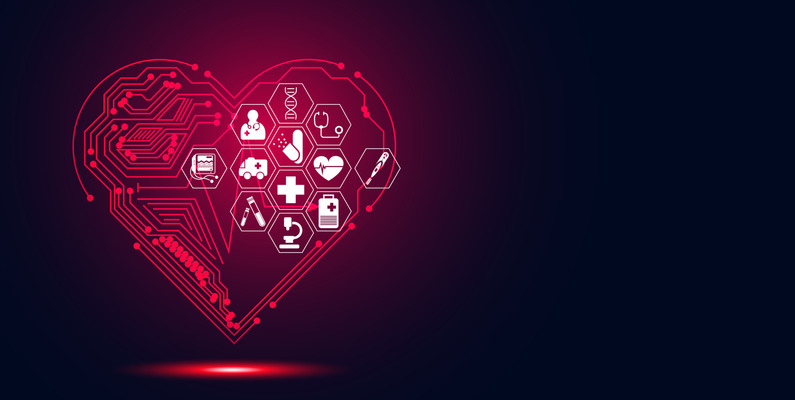

 #       Heart Health Stats Dataset

## About Dataset
This dataset comprises demographic information, vital signs, and heart health status indicators for individuals. It includes features such as age, gender, blood pressure, cholesterol levels, and whether the individual has experienced a heart attack. The dataset is valuable for analyzing trends related to cardiovascular health and assessing the risk factors associated with heart disease. Researchers and healthcare professionals can utilize this data to identify patterns, develop predictive models, and formulate personalized interventions for heart disease prevention and management.

<a href="https://colab.research.google.com/drive/1fWL9jekedzJmEtub6rsX0UtVO_PGc-MU?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
mydata=pd.read_csv("Heart_health.csv")


In [35]:
mydata.tail(5)

,ID,Name,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
719,710,Ashley Martinez,39,Female,166,68,118/76,195,88,No,3,0
720,711,James Rodriguez,56,Male,179,83,123/80,220,100,No,2,1
721,712,Mary Taylor,43,Female,167,70,120/78,200,92,No,2,0
722,713,Christopher Smith,53,Male,182,86,125/78,225,98,Yes,2,1
723,714,Jennifer Garcia,47,Female,170,73,121/77,205,94,Yes,3,1


In [36]:
mydata.head(6)

,ID,Name,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,1,John Doe,45,Male,175,80,120/80,200,90,No,3,0
1,2,Jane Smith,35,Female,160,65,110/70,180,80,No,2,0
2,3,Michael Johnson,55,Male,180,85,130/85,220,95,Yes,4,1
3,4,Sarah Brown,40,Female,165,70,115/75,190,85,No,3,0
4,5,David Lee,50,Male,170,75,125/80,210,92,Yes,2,1
5,6,Emily Davis,30,Female,155,60,105/65,170,75,No,1,0


In [9]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    724 non-null    int64 
 1   Name                  724 non-null    object
 2   Age                   724 non-null    int64 
 3   Gender                724 non-null    object
 4   Height(cm)            724 non-null    int64 
 5   Weight(kg)            724 non-null    int64 
 6   Blood Pressure(mmHg)  724 non-null    object
 7   Cholesterol(mg/dL)    724 non-null    int64 
 8   Glucose(mg/dL)        724 non-null    int64 
 9   Smoker                724 non-null    object
 10  Exercise(hours/week)  724 non-null    int64 
 11  Heart Attack          724 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 68.0+ KB


In [10]:
mydata.describe()

,ID,Age,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Exercise(hours/week),Heart Attack
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,361.712707,44.842541,171.161602,75.610497,206.022099,92.179558,2.770718,0.599448
std,207.901609,8.162429,6.242018,6.368595,11.224704,4.662712,0.934907,0.490349
min,1.000000,30.000000,155.000000,60.000000,170.000000,75.000000,1.000000,0.000000
25%,181.750000,38.000000,166.000000,71.000000,195.000000,88.000000,2.000000,0.000000
50%,362.500000,44.000000,170.000000,75.000000,210.000000,92.000000,3.000000,1.000000
75%,543.250000,53.000000,177.000000,81.000000,215.000000,96.000000,4.000000,1.000000
max,714.000000,60.000000,183.000000,89.000000,230.000000,100.000000,4.000000,1.000000


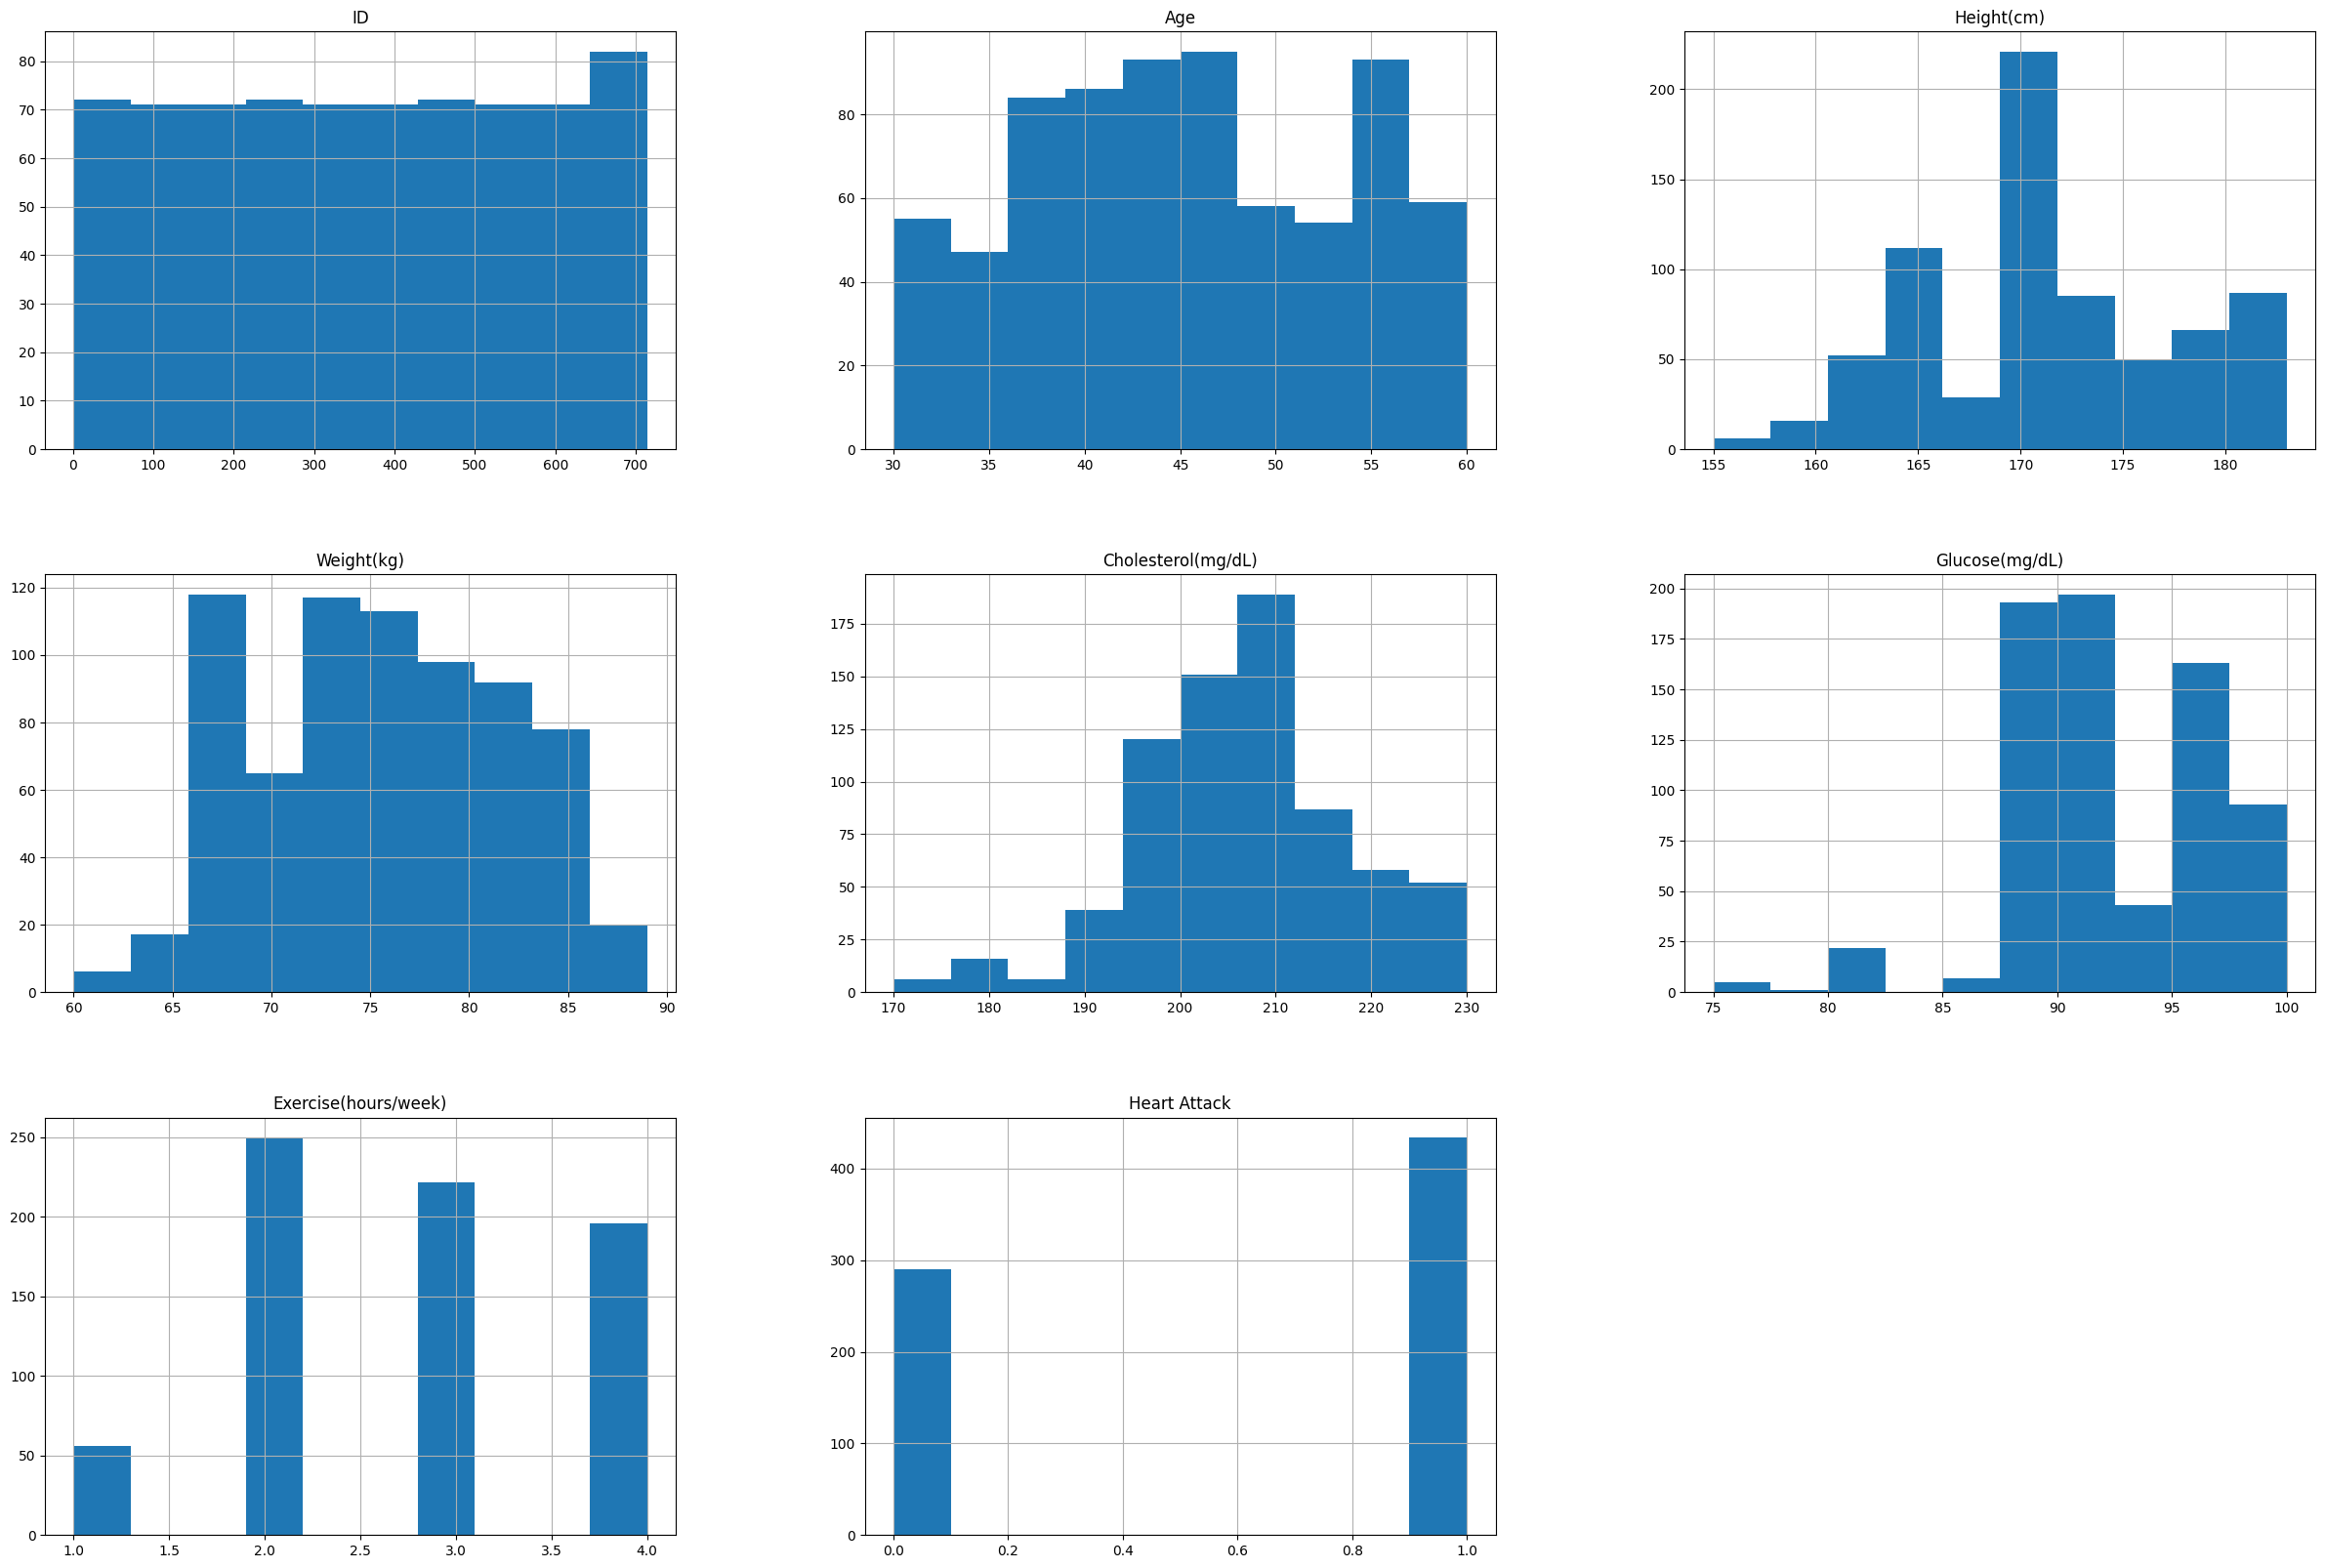

In [11]:
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

mydata.hist(figsize=(30,20))
plt.show()

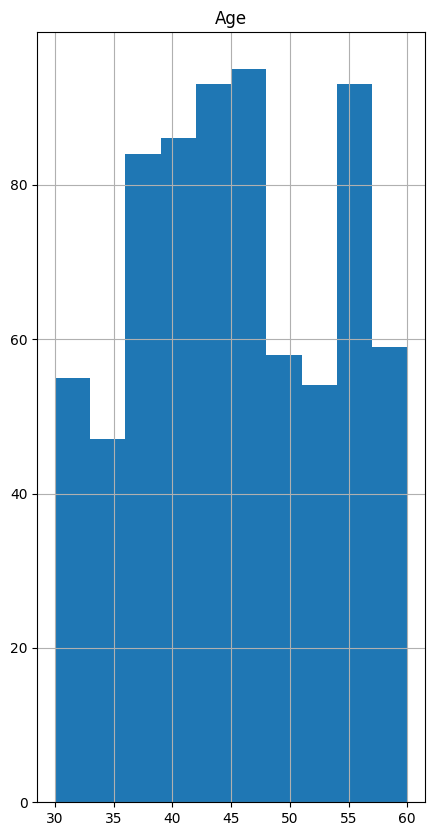

In [12]:
mydata.hist(['Age'], figsize=(5,10))
plt.show()

<Axes: xlabel='Gender', ylabel='Smoker'>

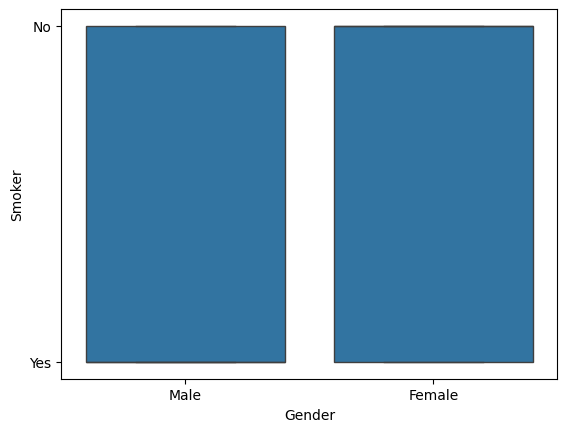

In [13]:
import seaborn as sns
sns.boxplot(x="Gender",y="Smoker",data=mydata)

In [14]:
pd.crosstab(mydata['Heart Attack'],mydata['Gender'])

Gender,Female,Male
Heart Attack,,
0,246,44
1,116,318


In [15]:
pd.crosstab(mydata['Heart Attack'],mydata['Age'] )

Age,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60
Heart Attack,,,,,,,,,,,,,,,,,,,,,
0,2,18,1,8,9,6,26,17,41,39,...,0,0,0,0,0,0,0,0,0,0
1,20,0,14,3,0,21,0,0,0,1,...,8,3,43,19,50,24,25,23,6,5


<Axes: xlabel='Age', ylabel='count'>

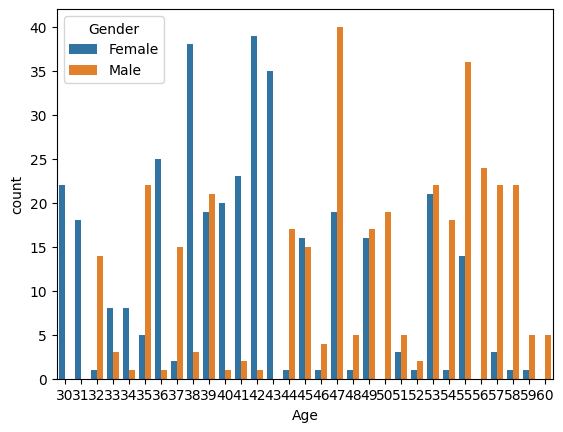

In [16]:
sns.countplot(x="Age", hue="Gender", data=mydata)


In [17]:
pd.pivot_table(mydata, index=['Age', 'Gender'],
                     columns=[ 'Heart Attack'], aggfunc=len)

Blood Pressure(mmHg)       Cholesterol(mg/dL)        \
Heart Attack                    0     1                  0     1   
Age Gender                                                         
30  Female                    2.0  20.0                2.0  20.0   
31  Female                   18.0   NaN               18.0   NaN   
32  Female                    1.0   NaN                1.0   NaN   
    Male                      NaN  14.0                NaN  14.0   
33  Female                    8.0   NaN                8.0   NaN   
    Male                      NaN   3.0                NaN   3.0   
34  Female                    8.0   NaN                8.0   NaN   
    Male                      1.0   NaN                1.0   NaN   
35  Female                    5.0   NaN                5.0   NaN   
    Male                      1.0  21.0                1.0  21.0   
36  Female                   25.0   NaN               25.0   NaN   
    Male                      1.0   NaN                1.0   NaN   
37  Female                    2.0   NaN                2.0   NaN   
    Male                     15.0   NaN               15.0   NaN   
38  Female                   38.0   NaN               38.0   NaN   
    Male                      3.0   NaN                3.0   NaN   
39  Female                   19.0   NaN               19.0   NaN   
    Male                     20.0   1.0               20.0   1.0   
40  Female                   20.0   NaN               20.0   NaN   
    Male                      1.0   NaN                1.0   NaN   
41  Female                   23.0   NaN               23.0   NaN   
    Male                      1.0   1.0                1.0   1.0   
42  Female                   39.0   NaN               39.0   NaN   
    Male                      NaN   1.0                NaN   1.0   
43  Female                   35.0   NaN               35.0   NaN   
44  Female                    NaN   1.0                NaN   1.0   
    Male                      NaN  17.0                NaN  17.0   
45  Female                    NaN  16.0                NaN  16.0   
    Male                      1.0  14.0                1.0  14.0   
46  Female                    1.0   NaN                1.0   NaN   
    Male                      NaN   4.0                NaN   4.0   
47  Female                    NaN  19.0                NaN  19.0   
    Male                      NaN  40.0                NaN  40.0   
48  Female                    1.0   NaN                1.0   NaN   
    Male                      NaN   5.0                NaN   5.0   
49  Female                    1.0  15.0                1.0  15.0   
    Male                      NaN  17.0                NaN  17.0   
50  Male                      NaN  19.0                NaN  19.0   
51  Female                    NaN   3.0                NaN   3.0   
    Male                      NaN   5.0                NaN   5.0   
52  Female                    NaN   1.0                NaN   1.0   
    Male                      NaN   2.0                NaN   2.0   
53  Female                    NaN  21.0                NaN  21.0   
    Male                      NaN  22.0                NaN  22.0   
54  Female                    NaN   1.0                NaN   1.0   
    Male                      NaN  18.0                NaN  18.0   
55  Female                    NaN  14.0                NaN  14.0   
    Male                      NaN  36.0                NaN  36.0   
56  Male                      NaN  24.0                NaN  24.0   
57  Female                    NaN   3.0                NaN   3.0   
    Male                      NaN  22.0                NaN  22.0   
58  Female                    NaN   1.0                NaN   1.0   
    Male                      NaN  22.0                NaN  22.0   
59  Female                    NaN   1.0                NaN   1.0   
    Male                      NaN   5.0                NaN   5.0   
60  Male                      NaN   5.0                NaN   5.0   



In [18]:
pd.pivot_table(mydata,'Glucose(mg/dL)', index=['Heart Attack', 'Gender'],
                     columns=[ 'Weight(kg)'])

Weight(kg)             60    61    62    63    64         65         66    67  \
Heart Attack Gender                                                             
0            Female  75.0  75.0  78.0  80.0  82.0  81.666667  87.111111  86.8   
             Male     NaN   NaN   NaN   NaN   NaN        NaN  80.000000   NaN   
1            Female   NaN   NaN   NaN   NaN   NaN        NaN        NaN   NaN   
             Male     NaN   NaN   NaN   NaN   NaN        NaN        NaN   NaN   

Weight(kg)                  68    69  ...    80     81         82     83  \
Heart Attack Gender                   ...                                  
0            Female  88.026316  85.0  ...   NaN    NaN        NaN    NaN   
             Male          NaN  85.0  ...  90.0    NaN        NaN    NaN   
1            Female        NaN   NaN  ...  92.0    NaN        NaN    NaN   
             Male          NaN   NaN  ...  91.5  94.75  96.666667  100.0   

Weight(kg)             84    85    86    87    88    89  
Heart Attack Gender                                      
0            Female   NaN   NaN   NaN   NaN   NaN   NaN  
             Male     NaN   NaN   NaN   NaN   NaN   NaN  
1            Female   NaN   NaN   NaN   NaN  97.0   NaN  
             Male    99.0  95.0  98.0  96.0  97.0  98.0  

[4 rows x 29 columns]

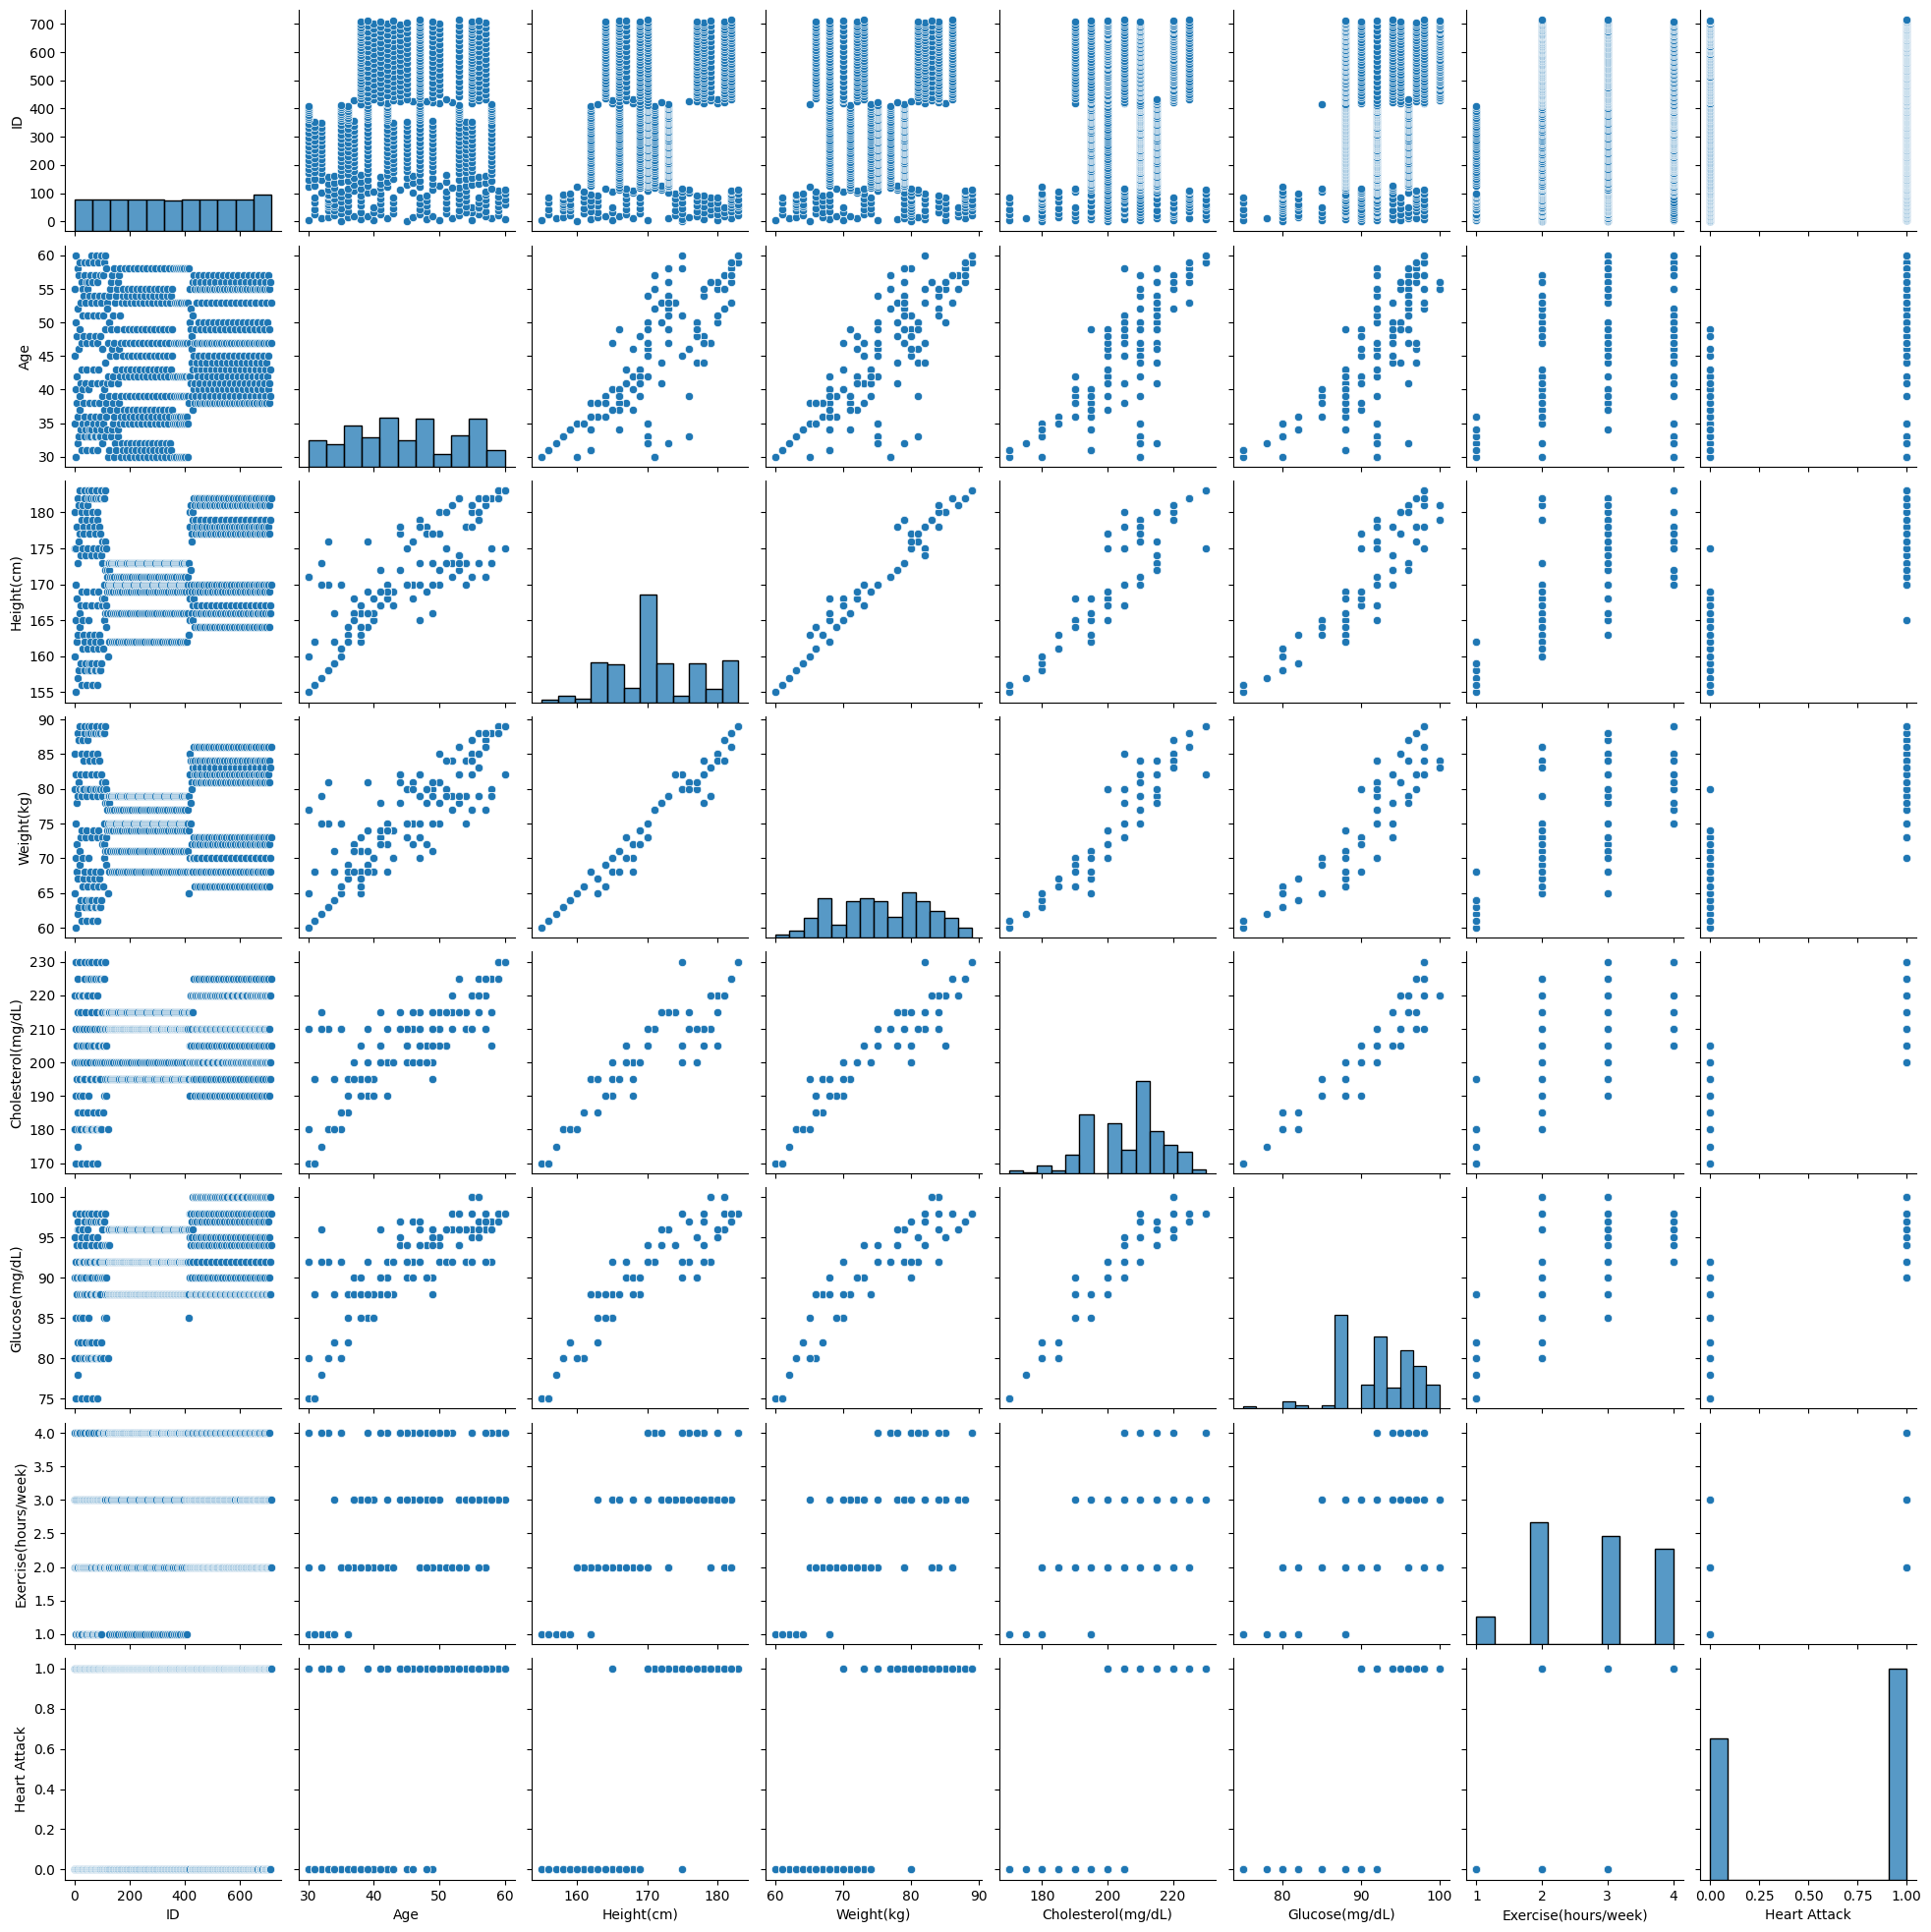

In [19]:
sns.pairplot(mydata)

In [20]:
mydata['Glucose(mg/dL)'].std()

4.662711838128831

In [21]:
np.random.seed(32)

In [22]:
x = st.skewnorm.rvs(10, size=10000)

In [23]:
x[3:10]

array([0.03345118, 0.7155955 , 0.75748411, 1.25673025, 1.73690242,
       0.23104569, 0.79374789])

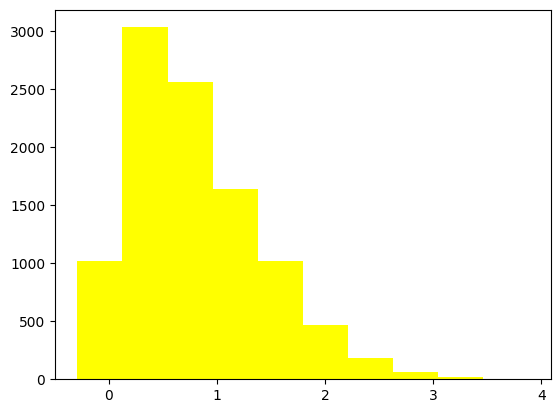

In [24]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'yellow')

In [25]:
xbar = x.mean()
xbar

0.7993680111125352

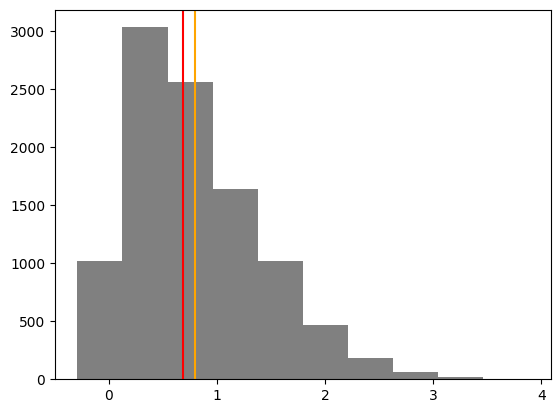

In [26]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='red')
_ = plt.hist(x, color = 'grey')

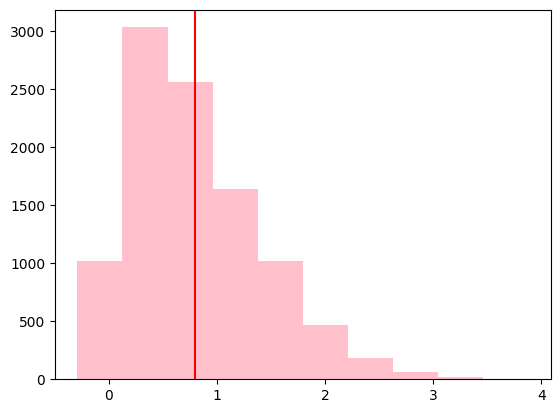

In [27]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='red')
_ = plt.hist(x, color = 'pink')

In [28]:
np.median(x) 

0.681622315783669

# Measures of Dispersion


$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [29]:
x.var()

0.37173422114174626

# Standard Deviation
A straightforward derivative of variance is standard deviation (denoted with 
), which is convenient because its units are on the same scale as the values in the distribution:
$$ \sigma = \sqrt{\sigma^2} $$


In [30]:
x.var()**(1/2)

0.6097001075461167

In [31]:
sigma = x.std()
sigma

0.6097001075461167

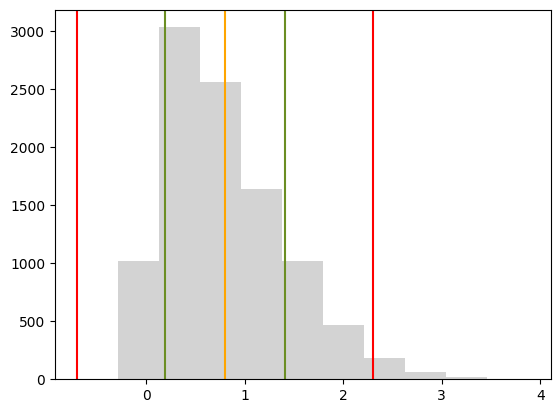

In [32]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
plt.axvline(x = xbar-1.5, color='red')
plt.axvline(x = xbar+1.5, color='red')
_ = plt.hist(x, color = 'lightgray')

<div class="alert alert-block alert-success">
<b>25/4/2024 Its done !
</div>


## Standard Error
A further derivation of standard deviation is standard error, which is denoted with 
:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [33]:
sigma/(x.size)**(1/2)


0.006097001075461167

In [29]:
st.sem(x) # defaults to 1 degree of freedom, which can be ignored with the larger data sets of ML

0.006100544537629672

In [ ]:
st.sem(x, ddof=0)

## Gaussian Distribution

In [30]:
x = np.random.normal(size=10000)

In [31]:
sns.set_style('ticks')

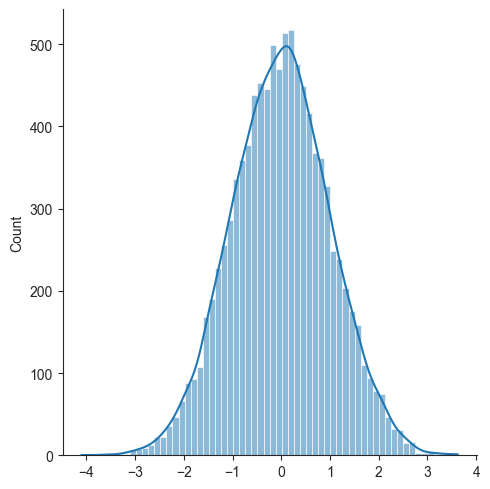

In [35]:
_ = sns.displot(x, kde=True)

In [36]:
x.mean()

-0.005547961997059755

In [37]:
x.std()

0.9997874924307779

.it is a **standard normal distribution** (a.k.a., standard Gaussian distribution or ***z*-distribution**), which can be denoted as $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (noting that $\sigma^2 = \sigma$ here because $1^2 = 1$).

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because: 

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial. 
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept. 

### The Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [37]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([ 0.9107175 ,  1.85915269,  1.03806096,  0.31310706,  0.20301235,
       -0.11784136,  0.5361705 ,  1.37784675,  0.1087319 ,  0.15543684])

In [38]:
x_sample.mean()

0.6384395197581091

In [40]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

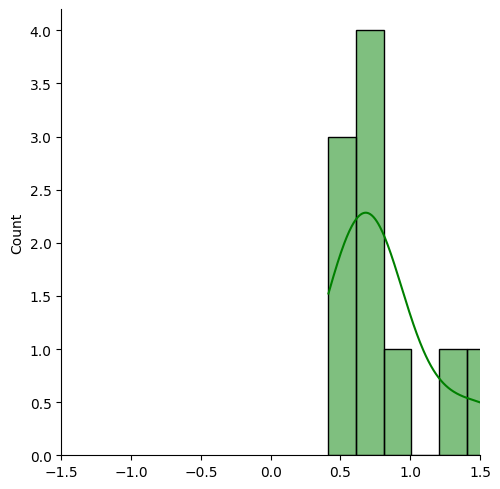

In [41]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

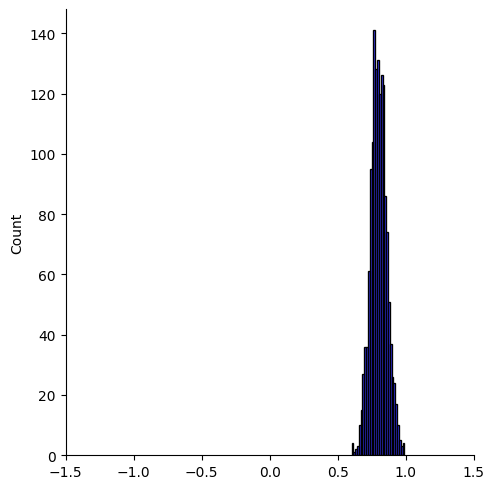

In [42]:
sns.displot(sample_mean_calculator(x, 100, 1500), color='blue', kde=False)
_ = plt.xlim(-1.5, 1.5)

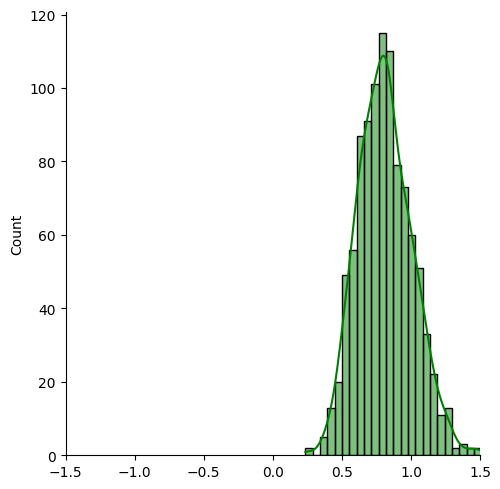

In [43]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

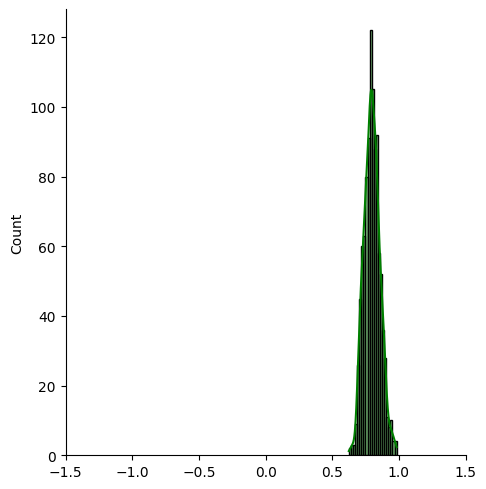

In [44]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

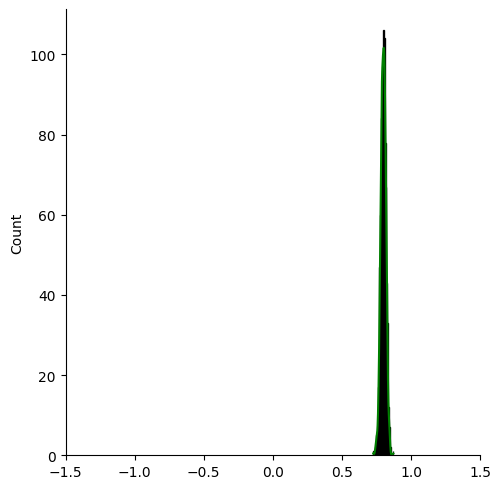

In [45]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

In [46]:
s = st.skewnorm.rvs(10, size=10000)


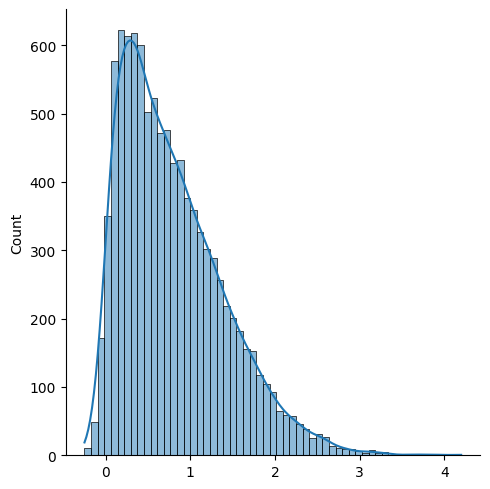

In [47]:
_ = sns.displot(s, kde=True)

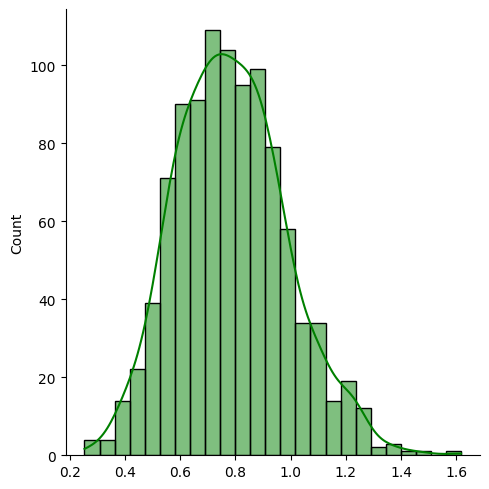

In [48]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

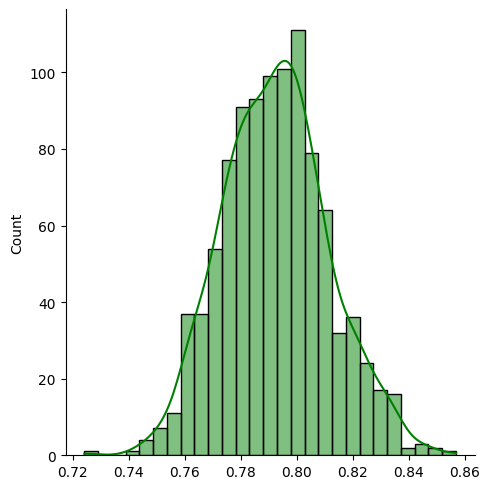

In [49]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

In [50]:
m = np.concatenate((np.random.normal(size=10000), np.random.normal(loc = 5.0, size=6000),  np.random.normal(loc = 10.0, size=4000),  np.random.normal(loc = 3.0, size=2000)))

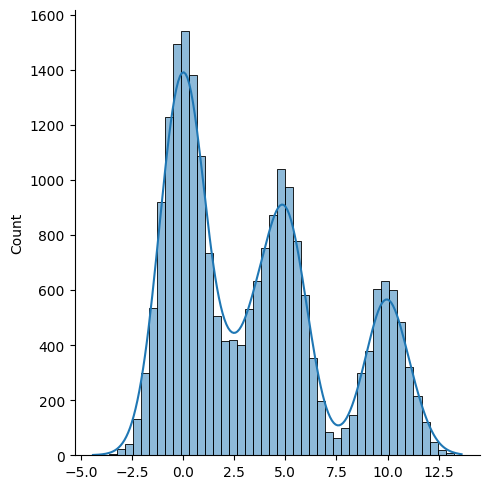

In [51]:
_ = sns.displot(m, kde=True)

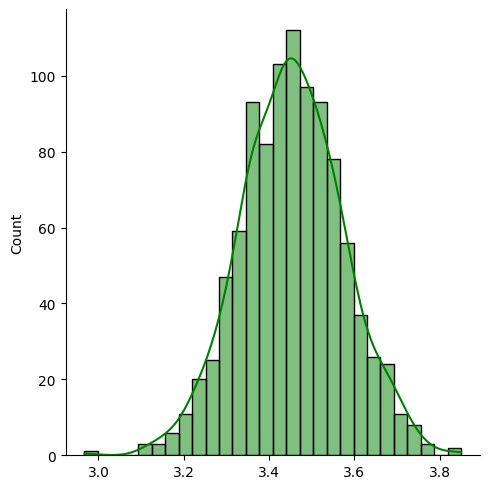

In [52]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

In [53]:
u = np.random.uniform(size=10000)

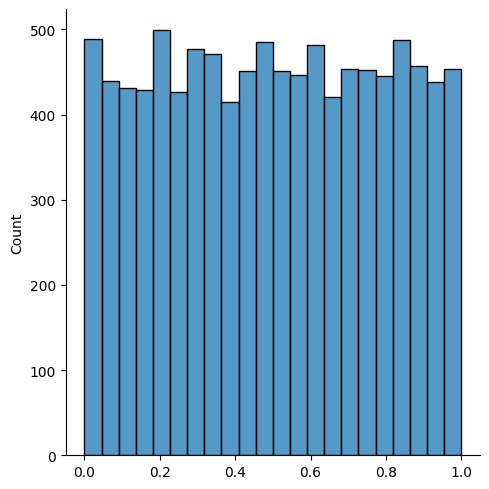

In [54]:
_ = sns.displot(u)

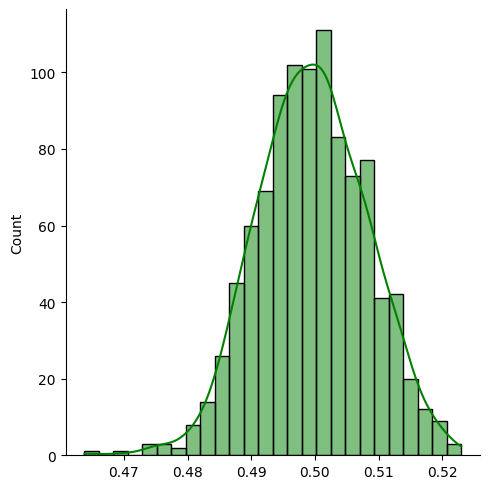

In [55]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" (covered shortly in *Intro to Stats*) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not. 

### z-scores

In [57]:
x_i = 83
mu = 65
sigma = 3

In [58]:
x = np.random.normal(mu, sigma, 15000)

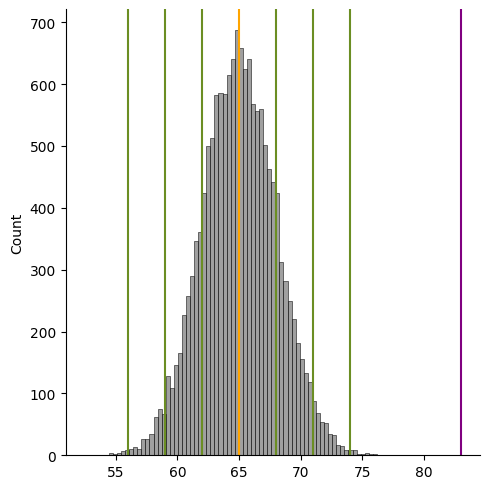

In [59]:
sns.displot(x, color='gray')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [60]:
z = (x_i - mu)/sigma
z

6.0

In [61]:
z = (x_i - np.mean(x))/np.std(x)
z

5.952085715850866

In [62]:
len(np.where(x > 83)[0])

0